## Imports

In [1]:
# Cargamos as librarías
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Csv

In [2]:
df = pd.read_csv('vgsales.csv')

#### Analisis simple de la estructura del dataframe

In [3]:
df.sample(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1250,1252,Monopoly,PS,1997.0,Misc,Hasbro Interactive,1.18,0.27,0.00,0.05,1.51
13639,13641,Amnesia,PSP,2011.0,Adventure,Idea Factory,0.00,0.00,0.04,0.00,0.04
16359,16362,NHL 2K7,XB,2006.0,Sports,Take-Two Interactive,0.01,0.00,0.00,0.00,0.01


In [4]:
df.shape

(16598, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)
print("Categorias:", cats)
print("Numéricas:", nums)

Categorias: ['Name', 'Platform', 'Genre', 'Publisher']
Numéricas: ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [9]:
cats.extend(['Year'])
nums.remove('Year')
nums.remove('Rank')
print(f'Variables categóricas: {cats}')
print(f'Variables numéricas: {nums}')

Variables categóricas: ['Name', 'Platform', 'Genre', 'Publisher', 'Year']
Variables numéricas: ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


Convertimos **Year** en categórica porque, pese a estar compuesta enteramente de string su rango es bajo y funciona mejor como categórica

Eliminamos **Rank** de las variables númericas porque es un índice

In [10]:
df.nunique(axis=0)

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

Podemos comprobar que todas las columnas tienen una cantidad de valores únicos bastante elevada, incluida las categóricas.

- **Rank** es el índice por el que esta ordenado el df
- **Name** es el nombre del videojuego. Se repite con frecuencia debido a que un mismo juego puede ser lanzado para distintas plataformas
- **Platform** es la plataforma a la que pertenece un juego. Un juego puede pertenecer a varias plataformas
- **Year** es el año de publicación del juego
- **Genre** es el género al que pertenece el juego; acción, puzzle...
- **Publisher** es el nombre del distribuidor del juego

El resto de campos representan las ventas de un determinado juego en distintas regiones del mundo.

## Limpiar el Dataset
Comprobamos si faltan datos o hay valores nulos

In [11]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "percent"])
missing_data.head(10)

,Total,percent
Year,271,0.016327
Publisher,58,0.003494
Rank,0,0.000000
Name,0,0.000000
Platform,0,0.000000
Genre,0,0.000000
NA_Sales,0,0.000000
EU_Sales,0,0.000000
JP_Sales,0,0.000000
Other_Sales,0,0.000000


Como la cantidad de datos que faltan en **Publisher** es muy pequeña eliminamos eso datos.

Reajustamos el indice del dataset para que utilize **Rank**

In [12]:
df.dropna(subset = ['Publisher'],inplace=True)
df.drop_duplicates(inplace=True)
df.set_index('Rank',inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


Como curiosidad y analizando los datos de los **Year** que faltan podemos comprobar que la mayoría de los datos que faltan pertenezen a las plataformas con más entradas

In [13]:
data2= df.copy()[['Year', 'Platform']]
data2['flag']= data2['Year'].isna().astype(int)
df_auxiliar= data2.groupby('Platform',as_index=False)['flag'].sum()
df_auxiliar['% of missing - Year']= df_auxiliar.apply(lambda x: x['flag']/df_auxiliar[df_auxiliar['Platform']==x['Platform']].shape[0],axis=1)
df_auxiliar.sort_values('% of missing - Year',ascending=False, inplace=True)
df_auxiliar.head()

,Platform,flag,% of missing - Year
26,Wii,34,34.0
16,PS2,32,32.0
28,X360,27,27.0
4,DS,25,25.0
17,PS3,22,22.0


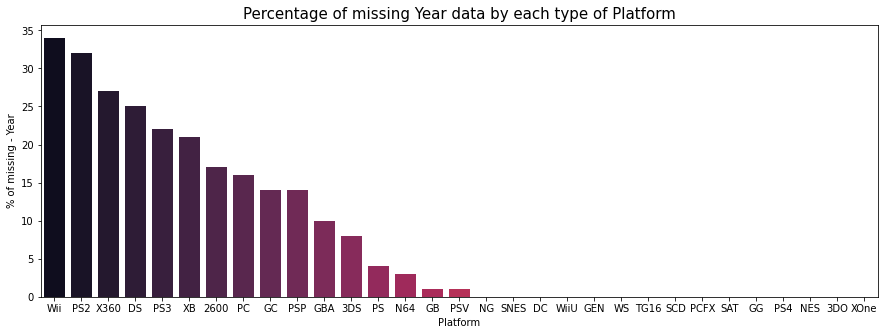

In [14]:
fig, ax=plt.subplots(figsize=(15,5))
sns.barplot(x='Platform',y='% of missing - Year',data=df_auxiliar,ax=ax, palette='rocket')
ax.set_title('Percentage of missing Year data by each type of Platform', fontsize=15);

<AxesSubplot:xlabel='Platform', ylabel='count'>

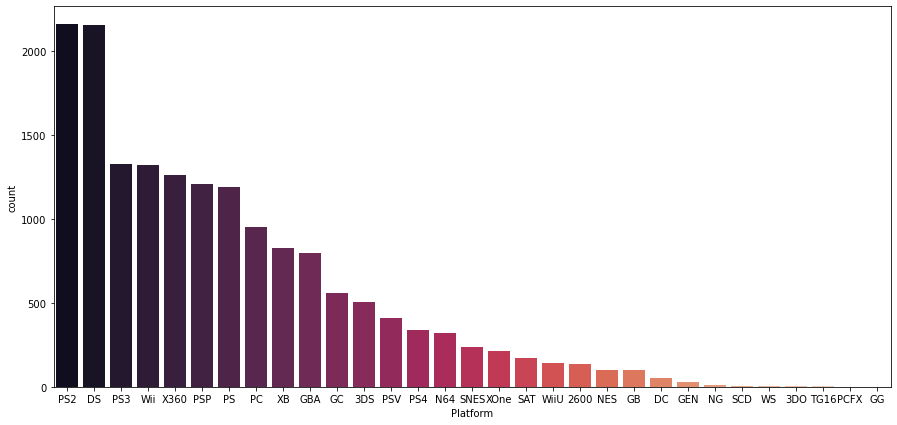

In [15]:
fig, ax = plt.subplots(figsize=[15,7])
sns.countplot(data=df,x='Platform', order=df.Platform.value_counts().index, palette='rocket')

Eliminamos los campos sin **Year**

In [16]:
df.dropna(subset = ['Year'],inplace=True)
df.drop_duplicates(inplace=True)

In [17]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "percent"])
missing_data.head(10)

,Total,percent
Name,0,0.0
Platform,0,0.0
Year,0,0.0
Genre,0,0.0
Publisher,0,0.0
NA_Sales,0,0.0
EU_Sales,0,0.0
JP_Sales,0,0.0
Other_Sales,0,0.0
Global_Sales,0,0.0


Nuestro dataset ya está listo para las demás pruebas. Ya no contiene campos vacios ni valures **Null**

In [18]:
df_save = df.copy() #Almacenamos nuestro df por si tenemos que restaurarlo

## Análisis Númerico

Text(0.5, 1.0, 'Listado de los 100 primeros juegos NA_Sales')

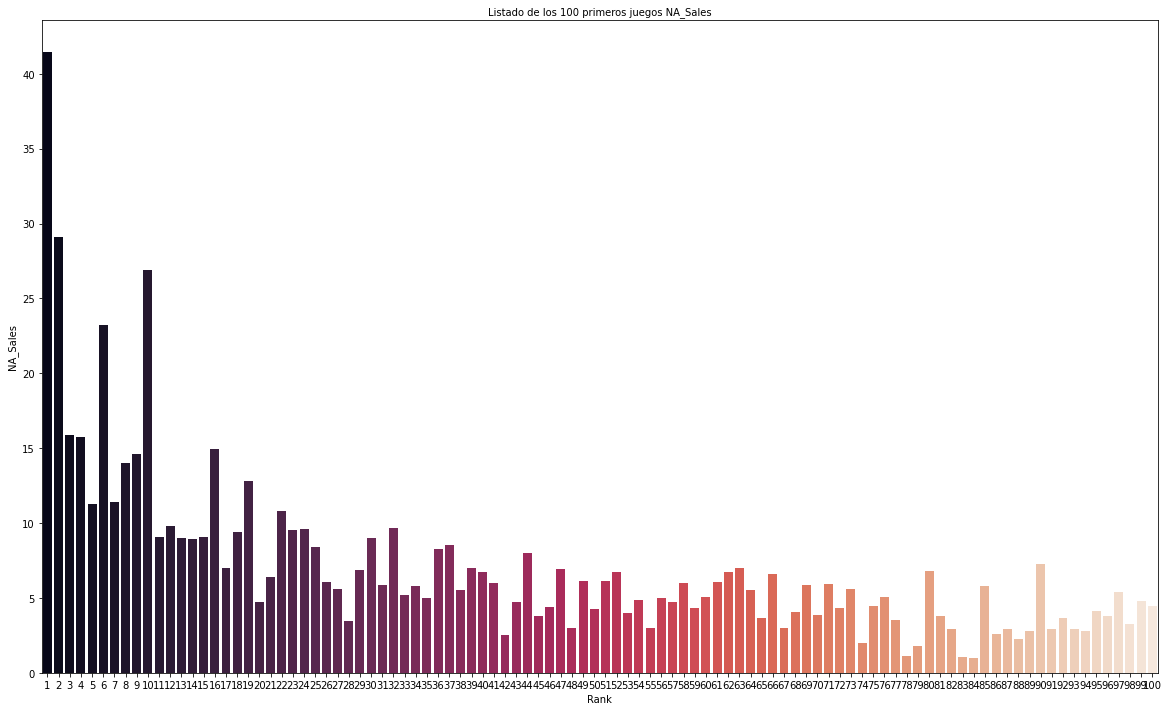

In [19]:
fig, ax= plt.subplots(figsize=(20,12))
sns.barplot(x='Rank', y="NA_Sales" ,data=df["NA_Sales"].reset_index().head(100), palette='rocket')
ax.set_title(f'Listado de los 100 primeros juegos {"NA_Sales"}', fontsize=10)

Text(0.5, 1.0, 'Listado de los 100 primeros juegos EU_Sales')

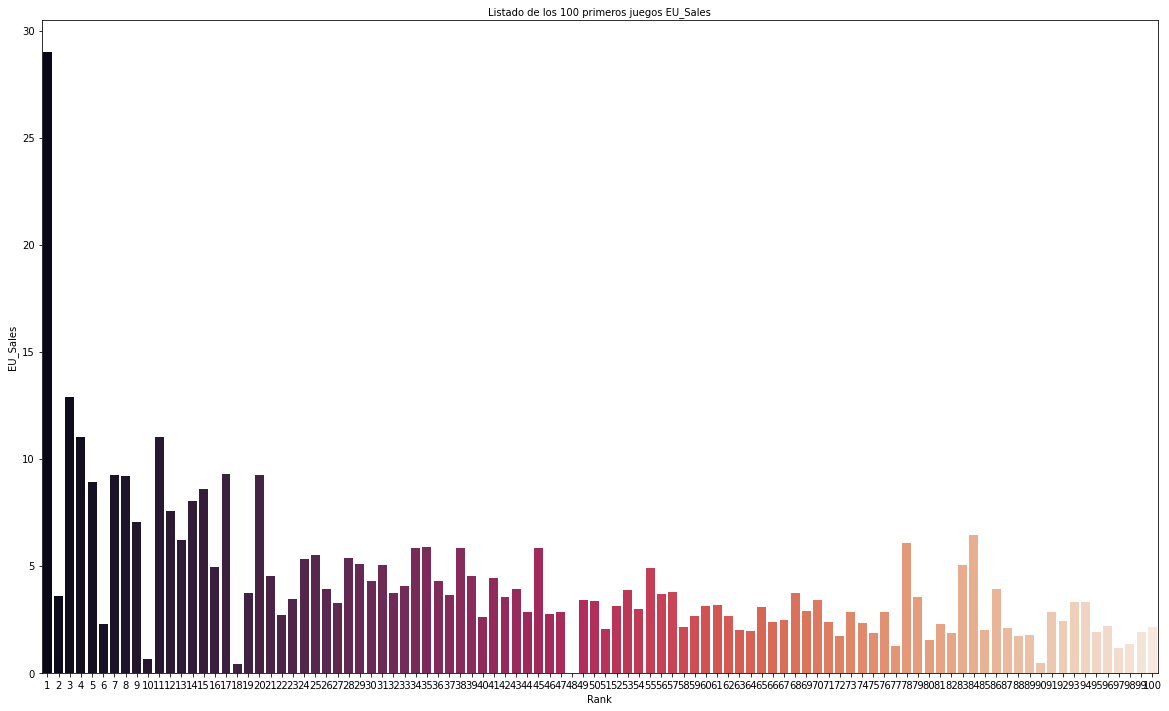

In [20]:
fig, ax= plt.subplots(figsize=(20,12))
sns.barplot(x='Rank', y="EU_Sales" ,data=df["EU_Sales"].reset_index().head(100), palette='rocket')
ax.set_title(f'Listado de los 100 primeros juegos {"EU_Sales"}', fontsize=10)

Text(0.5, 1.0, 'Listado de los 100 primeros juegos JP_Sales')

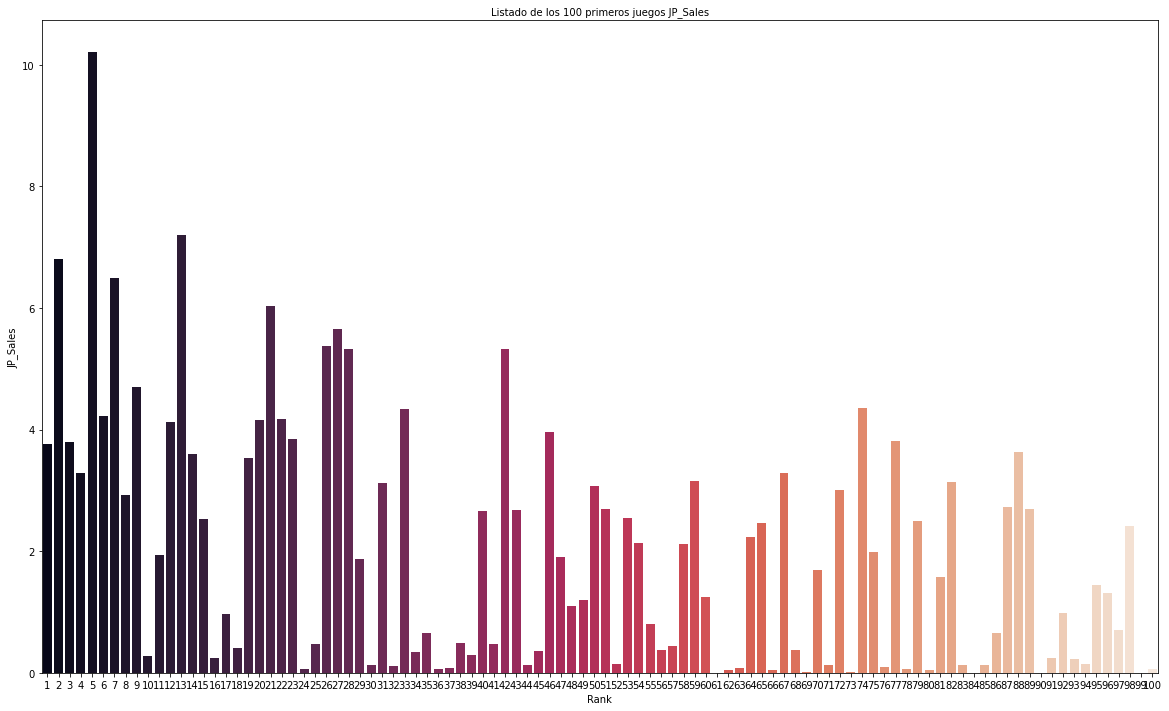

In [21]:
fig, ax= plt.subplots(figsize=(20,12))
sns.barplot(x='Rank', y="JP_Sales" ,data=df["JP_Sales"].reset_index().head(100), palette='rocket')
ax.set_title(f'Listado de los 100 primeros juegos {"JP_Sales"}', fontsize=10)

Text(0.5, 1.0, 'Listado de los 100 primeros juegos Other_Sales')

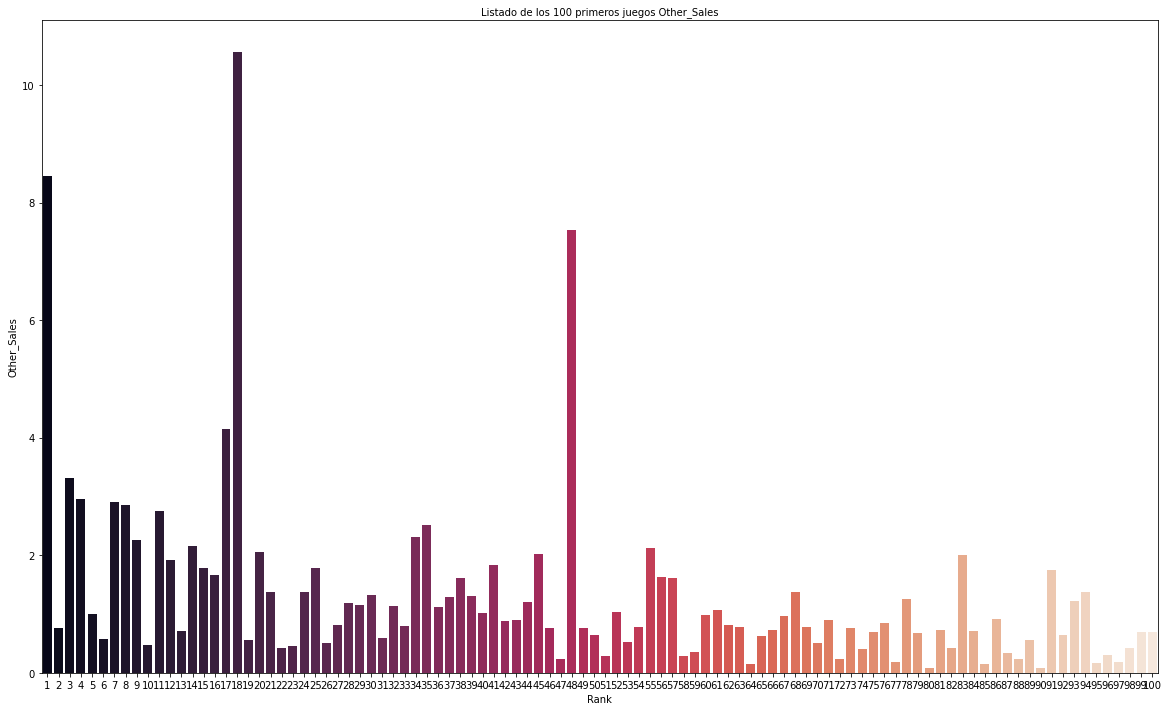

In [22]:
fig, ax= plt.subplots(figsize=(20,12))
sns.barplot(x='Rank', y="Other_Sales" ,data=df["Other_Sales"].reset_index().head(100), palette='rocket')
ax.set_title(f'Listado de los 100 primeros juegos {"Other_Sales"}', fontsize=10)

Text(0.5, 1.0, 'Listado de los 100 primeros juegos Global_Sales')

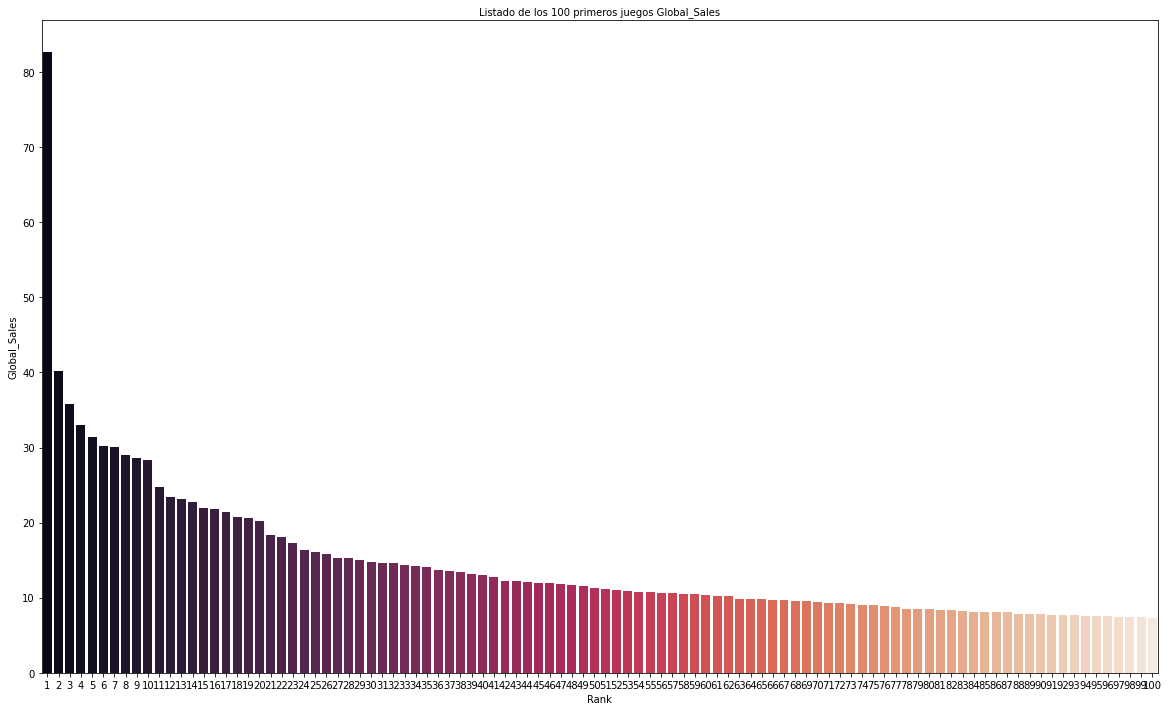

In [23]:
fig, ax= plt.subplots(figsize=(20,12))
sns.barplot(x='Rank', y="Global_Sales" ,data=df["Global_Sales"].reset_index().head(100), palette='rocket')
ax.set_title(f'Listado de los 100 primeros juegos {"Global_Sales"}', fontsize=10)

En estas gráficas podemos apreciar como de bien se vendieron los 100 primeros juegos en las distintas regiones. Cabe resaltar que las gráficas **NO** estan en el mismo rango de valores. Los primeros 100 juegos se han ventido el triple o cuádruple en **Norte America** y **Europa** que en resto del mundo


Como cabría esperar en una lista que ordena sus elementos por el nº total de ventas, **Global_Sales** corresponde casi perfectamente a **Rank**

In [24]:
sale_rank= pd.DataFrame({'column':nums})
sale_rank['Corr with Rank']= sale_rank['column'].apply(lambda x:df.reset_index()[[x,'Rank']].corr().iloc[0,1])
sale_rank

,column,Corr with Rank
0,NA_Sales,-0.400315
1,EU_Sales,-0.379137
2,JP_Sales,-0.269323
3,Other_Sales,-0.332735
4,Global_Sales,-0.426975


La matriz de coorelación nos indica que los campos que más determinan el rango son las ventas en **Norte America** y las ventas **Globales**

**Global_Sales** no tiene una relación mayor porque existen datos de varios juegos con un **Global_Sales** idéntico. Para ordenarlo en esos casos se hace uso de las claves categóricas

In [25]:
sale_rank= pd.DataFrame({'column':nums})
sale_rank['Corr with Rank']= sale_rank['column'].apply(lambda x:df.reset_index()[[x,'NA_Sales']].corr().iloc[0,1])
sale_rank

,column,Corr with Rank
0,NA_Sales,1.000000
1,EU_Sales,0.768923
2,JP_Sales,0.451283
3,Other_Sales,0.634518
4,Global_Sales,0.941269


In [26]:
sale_rank= pd.DataFrame({'column':nums})
sale_rank['Corr with Rank']= sale_rank['column'].apply(lambda x:df.reset_index()[[x,'EU_Sales']].corr().iloc[0,1])
sale_rank

,column,Corr with Rank
0,NA_Sales,0.768923
1,EU_Sales,1.000000
2,JP_Sales,0.436379
3,Other_Sales,0.726256
4,Global_Sales,0.903264


In [27]:
sale_rank= pd.DataFrame({'column':nums})
sale_rank['Corr with Rank']= sale_rank['column'].apply(lambda x:df.reset_index()[[x,'JP_Sales']].corr().iloc[0,1])
sale_rank

,column,Corr with Rank
0,NA_Sales,0.451283
1,EU_Sales,0.436379
2,JP_Sales,1.000000
3,Other_Sales,0.290559
4,Global_Sales,0.612774


In [28]:
sale_rank= pd.DataFrame({'column':nums})
sale_rank['Corr with Rank']= sale_rank['column'].apply(lambda x:df.reset_index()[[x,'Other_Sales']].corr().iloc[0,1])
sale_rank

,column,Corr with Rank
0,NA_Sales,0.634518
1,EU_Sales,0.726256
2,JP_Sales,0.290559
3,Other_Sales,1.000000
4,Global_Sales,0.747964


In [29]:
sale_rank= pd.DataFrame({'column':nums})
sale_rank['Corr with Rank']= sale_rank['column'].apply(lambda x:df.reset_index()[[x,'Global_Sales']].corr().iloc[0,1])
sale_rank

,column,Corr with Rank
0,NA_Sales,0.941269
1,EU_Sales,0.903264
2,JP_Sales,0.612774
3,Other_Sales,0.747964
4,Global_Sales,1.000000


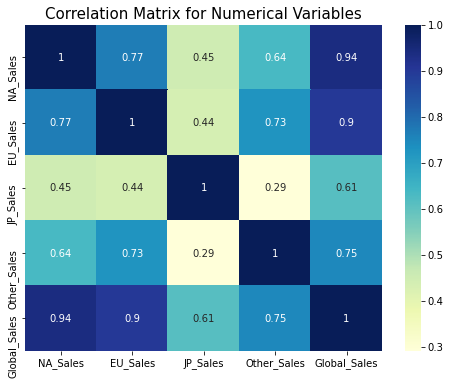

In [30]:
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(df[nums].corr().round(3), annot=True, cmap='YlGnBu', ax=ax)
ax.set_title('Correlation Matrix for Numerical Variables', fontsize=15);

Gracias a las matrices de correlación sabemos que:
- Las ventas globales vienen marcadas principalmente por **Norte America**
- Las ventas en **Norte America** influyen en gran medida a **Europa**
- Curiosamente **Europa** influye más a **otros países** que la propia **Norte America**
- Las ventas en **Japón** influyen poco en el resto del mundo y se ven poco influidas por este


## Análisis Categórico

In [31]:
df_cat= df[cats]#dataframe solo con las variables categoricas
df_cat.sample(3)

,Name,Platform,Genre,Publisher,Year
Rank,,,,,
6796,Homefront,PC,Shooter,THQ,2011.0
15587,Arabians Lost: The Engagement on Desert,PS2,Adventure,Prototype,2007.0
2326,Madagascar,GBA,Platform,Activision,2005.0


In [32]:
print(f"Categorías en Platform: {pd.unique(df_cat['Platform'])}")
print(f"Categorías en Genre: {pd.unique(df_cat['Genre'])}")
print(f"Categorías en Publisher: {pd.unique(df_cat['Publisher'])}")
print(f"Categorías en Year: {pd.unique(df_cat['Year'])}")

Categorías en Platform: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Categorías en Genre: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Categorías en Publisher: ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 

#### **Genre**

<AxesSubplot:xlabel='Genre', ylabel='count'>

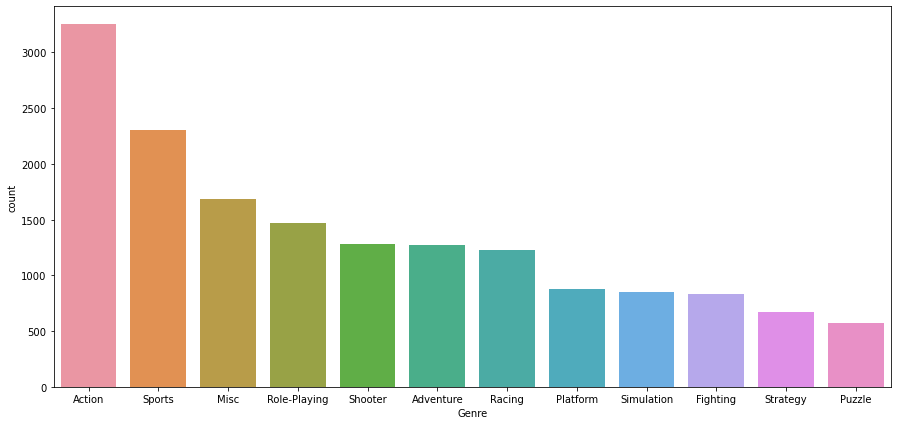

In [33]:
fig, ax = plt.subplots(figsize=[15,7])
sns.countplot(data=df_cat,x='Genre', order=df_cat.Genre.value_counts().index)

Las gráficas muestran los **Genre** con más entradas. Esto no significa que sean los que más ventas tienen

#### **Platform**

<AxesSubplot:xlabel='Platform', ylabel='count'>

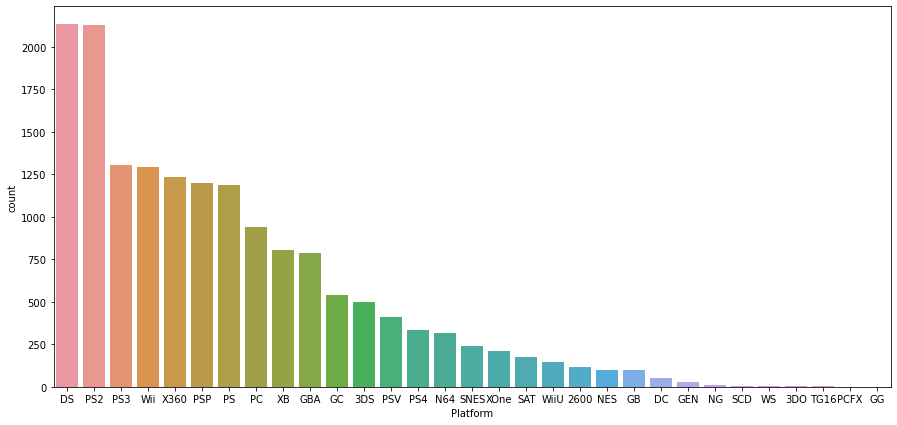

In [34]:
fig, ax = plt.subplots(figsize=[15,7])
sns.countplot(data=df_cat,x='Platform', order=df_cat.Platform.value_counts().index)

#### **Year**

<AxesSubplot:xlabel='Year', ylabel='count'>

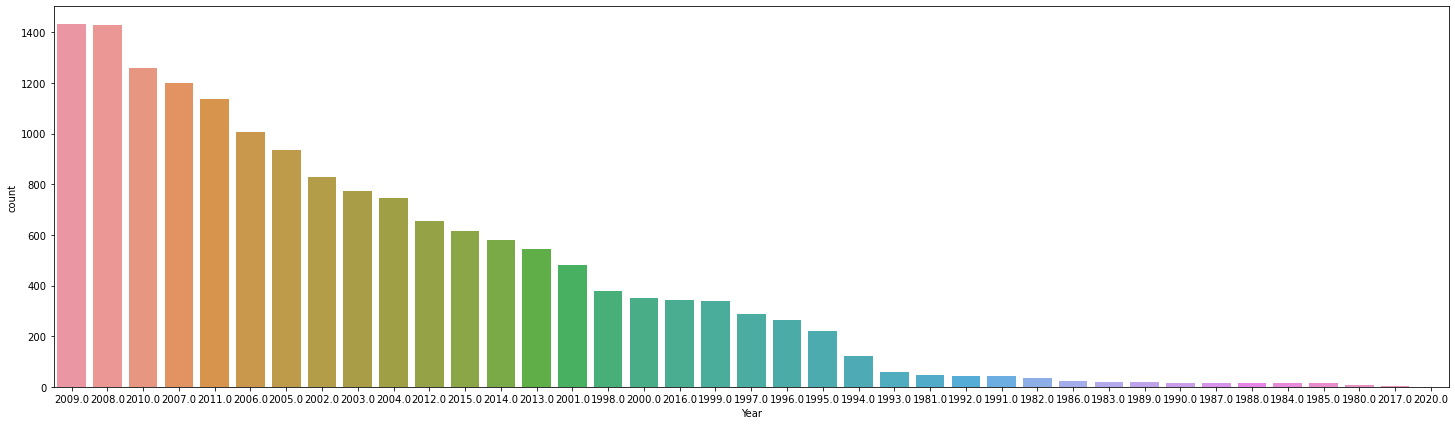

In [35]:
fig, ax = plt.subplots(figsize=[25,7])
sns.countplot(data=df_cat,x='Year', order=df_cat.Year.value_counts().index)

Para visualizar e interpretar mejor los datos de **Year** los reordenamos de nuevo

<AxesSubplot:xlabel='Year', ylabel='count'>

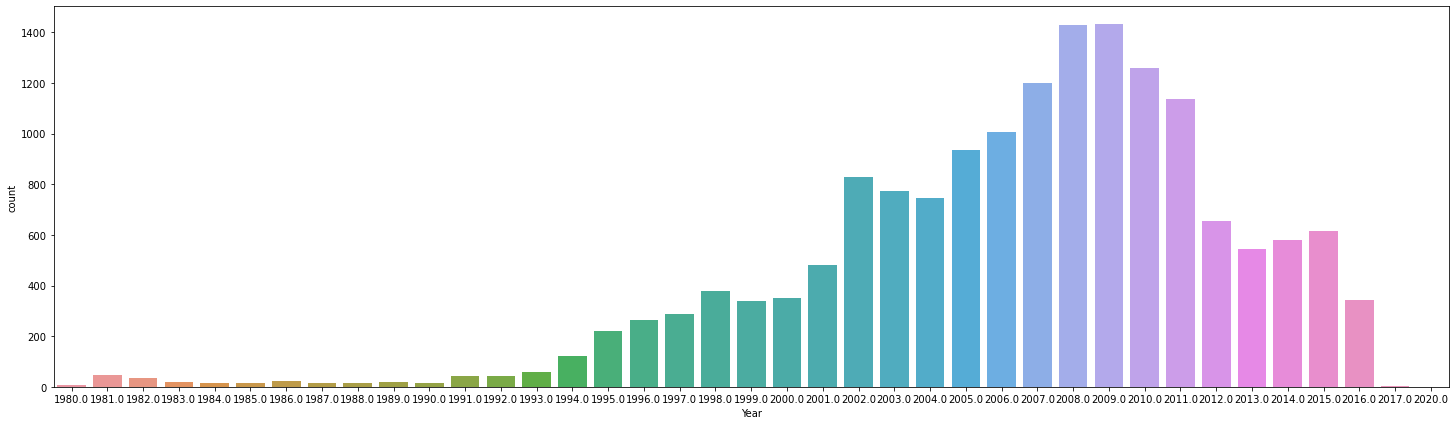

In [36]:
fig, ax = plt.subplots(figsize=[25,7])
sns.countplot(data=df_cat,x='Year',)

Podemos apreciar que la producción de juegos no esta distribuida equitatibamente. 

Como curiosidad los juegos producidos en los **Year** con más juegos pertenecen a las **Platform** más populares del df

Las gráficas anteriores nos confirman que los datos estan sesgados y desactualizados. La mayoria de registros se concentran entre el 2005 y 2012

In [37]:
num_rows, num_cols = df.shape

In [38]:
for i,cat in enumerate(df_cat.columns):
    val_counts = df_cat[cat].value_counts()
    dominant_frac = val_counts.iloc[0] / num_rows
    print(f'`{val_counts.index[0]}` contribuye por si solo en un  {round(dominant_frac * 100, 2)}% de {cat}')

`Need for Speed: Most Wanted` contribuye por si solo en un  0.07% de Name
`DS` contribuye por si solo en un  13.08% de Platform
`Action` contribuye por si solo en un  19.96% de Genre
`Electronic Arts` contribuye por si solo en un  8.22% de Publisher
`2009.0` contribuye por si solo en un  8.78% de Year


Text(0.5, 1.0, 'Platform / Year')

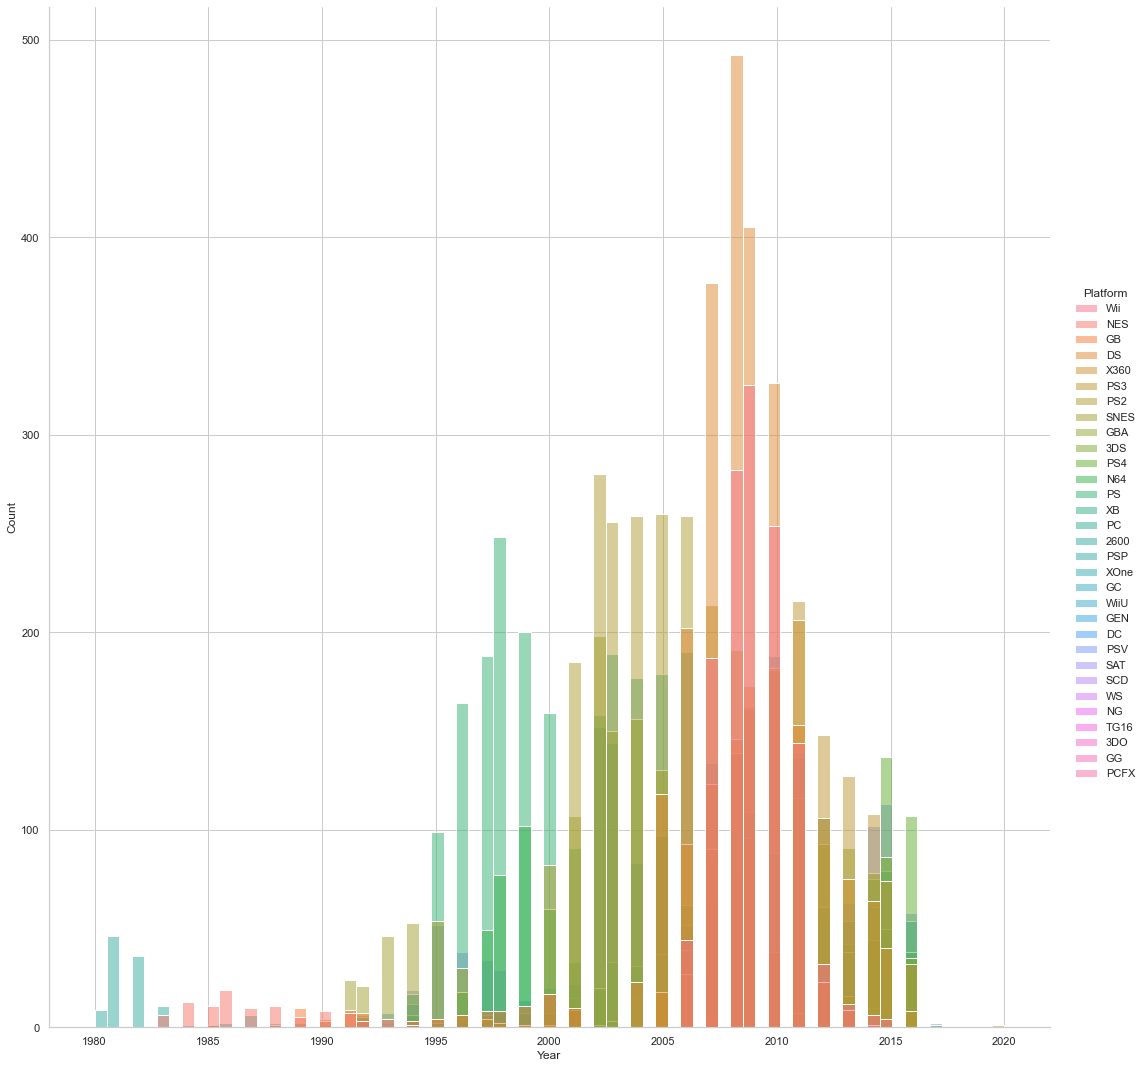

In [39]:
sns.set_theme(style="whitegrid")
sns.displot(x='Year', hue='Platform', data=df_cat,height=15)
ax.set_title(f'Platform / Year', fontsize=10)

Cabe la pena destacar que, consultanto datos externos, no se tienen registros de un **Platform** antes de su creación

Text(0.5, 1.0, 'Genre / Year')

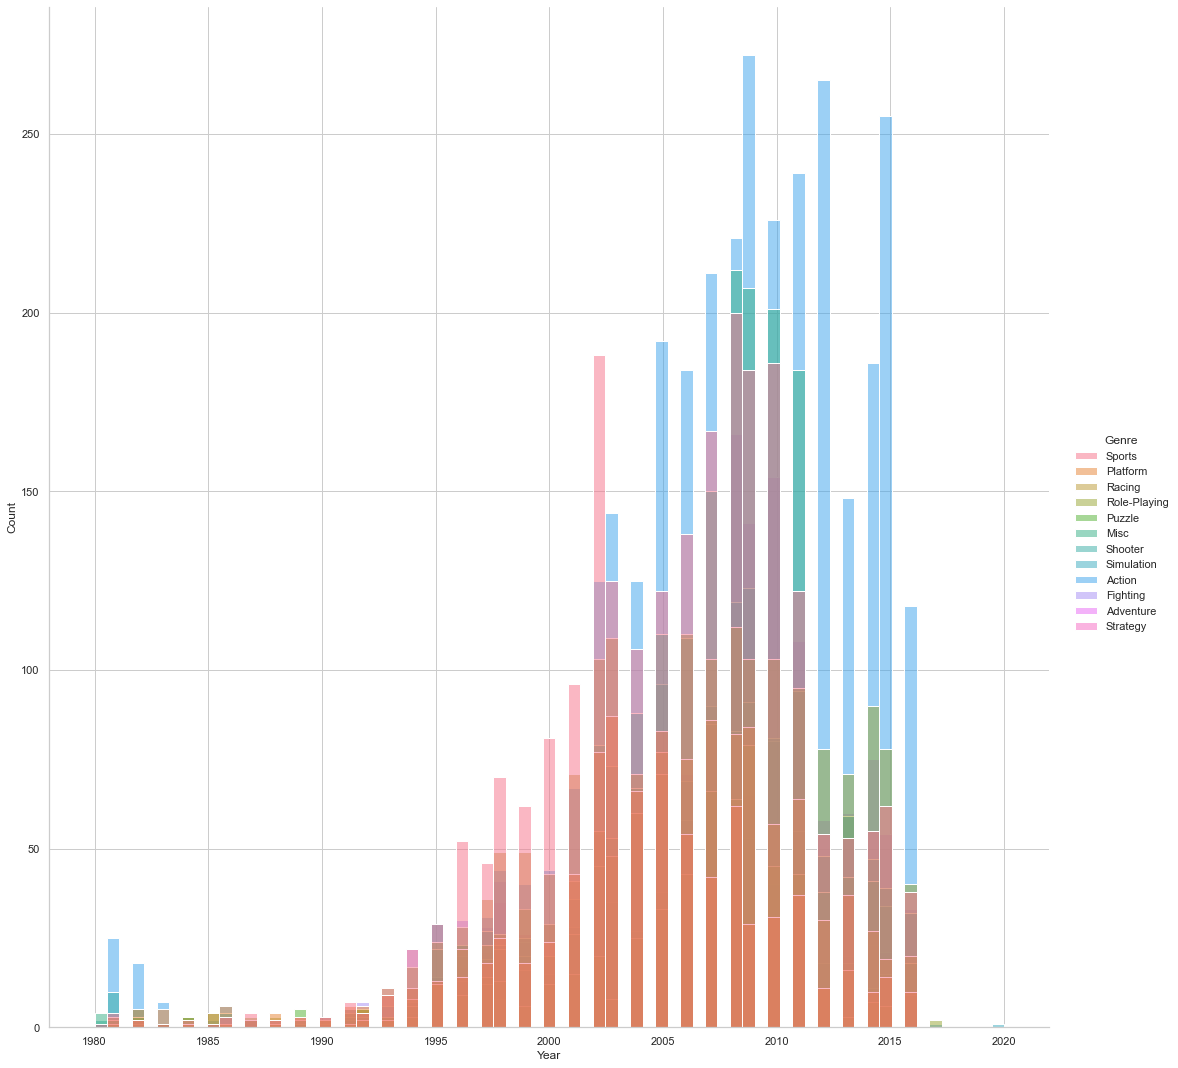

In [40]:
sns.displot(x='Year', hue='Genre', data=df_cat,height=15)
ax.set_title(f'Genre / Year', fontsize=10)

Las tendencias de **Genre** varian entre cada añp. El genero con más entradas **Sport** tubo un gran crecimiento a partir de 2003

Text(0.5, 1.0, 'Genre / Platform')

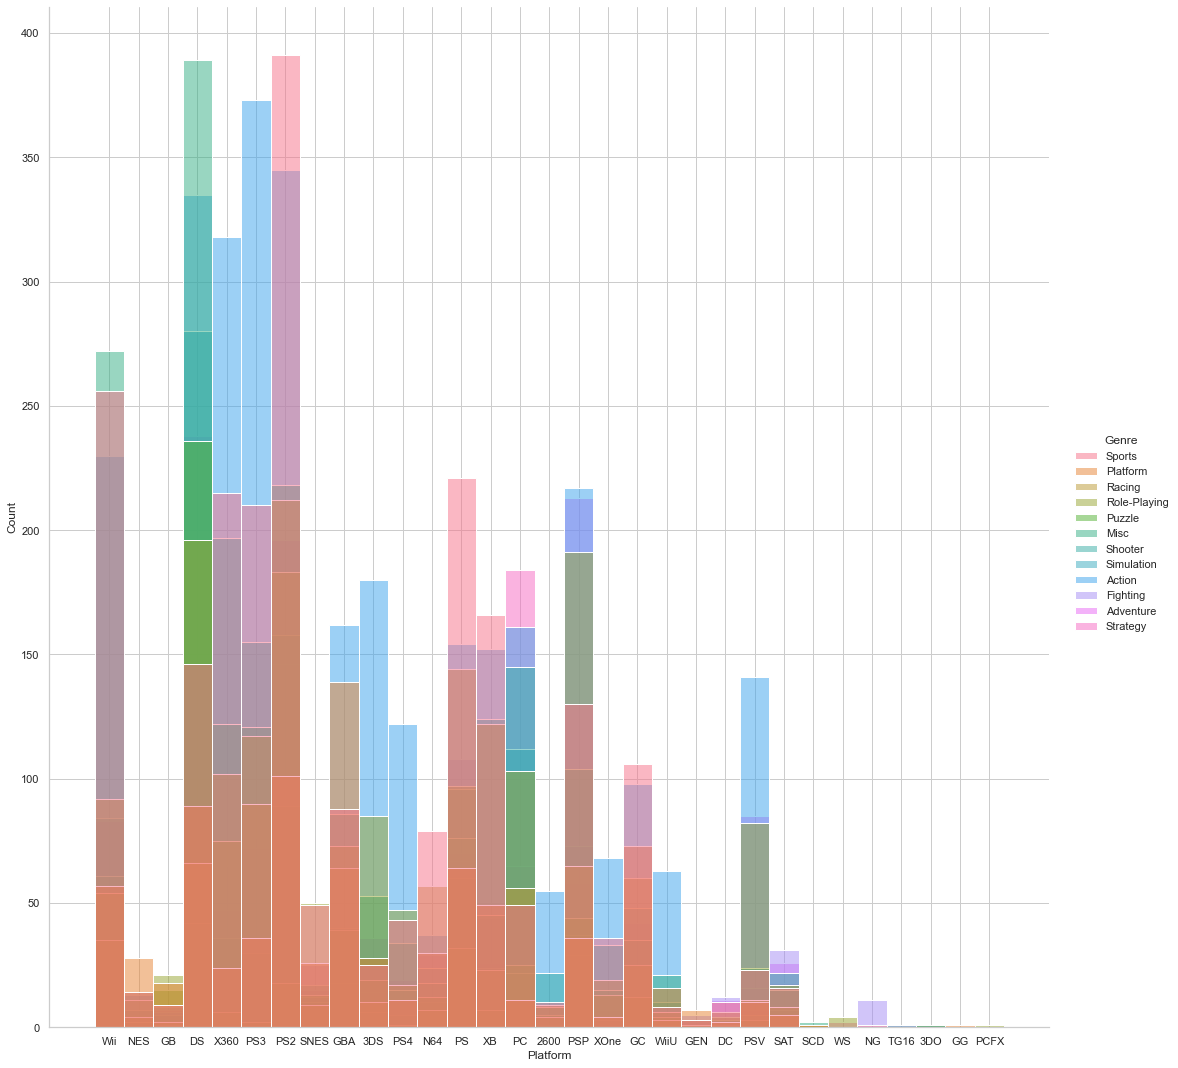

In [41]:
sns.displot(x='Platform', hue='Genre', data=df_cat,height=15)
ax.set_title(f'Genre / Platform', fontsize=10)

Los **Genre** más populares para las **Platform** más populares
- wii Fighting
- ds Platform
- x360 Action
- ps3 Action
- ps2 Adventure

## Análisis Categórico vs Numérico

##### Influye el **Year** en el total de ventas de un juego?

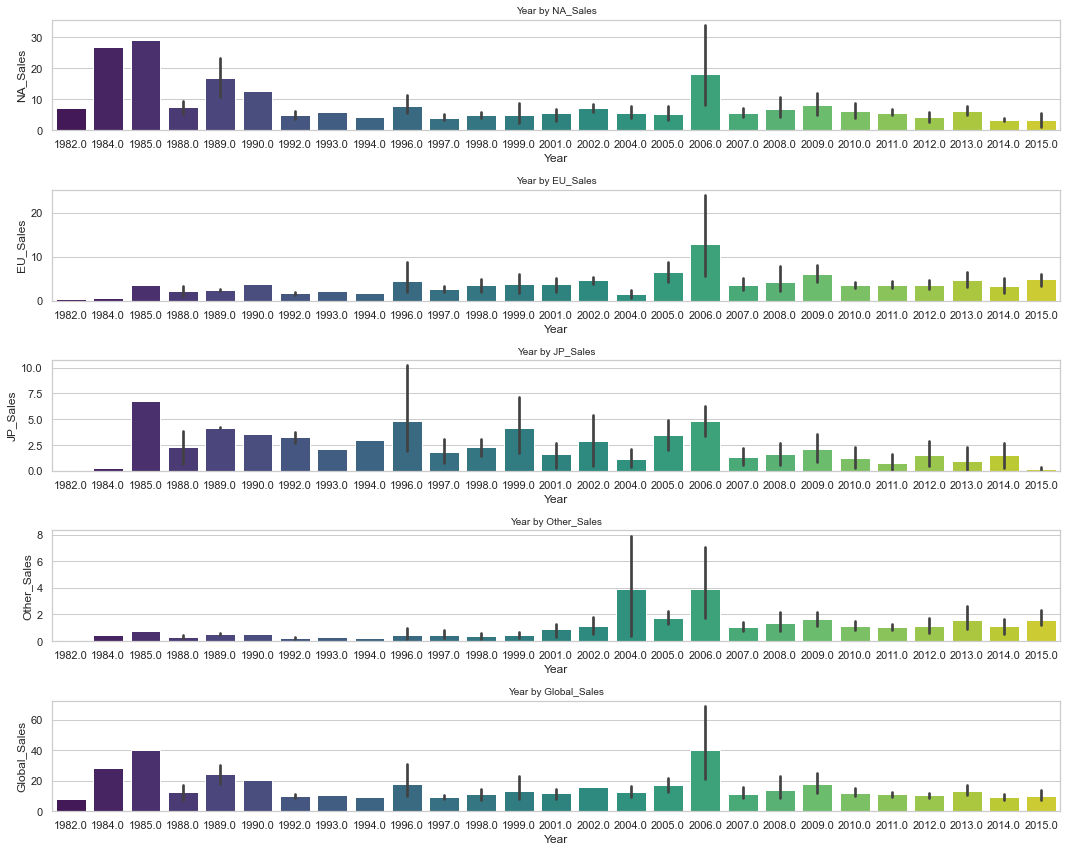

In [42]:
df.set_index('Year', inplace=True)
fig, ax= plt.subplots(nrows=5,figsize=(15,12))
for i in range(5):
    sns.barplot(x='Year', y=nums[i] ,data=df[nums[i]].reset_index().head(100), palette='viridis', ax=ax[i])
    ax[i].set_title(f'Year by {nums[i]}', fontsize=10)
    #ax[i].xaxis.set_visible(False)
fig.tight_layout();

In [50]:
# We can confirm our conclusion by look at correlation btw rank and each Sales attribute 
sale_rank= pd.DataFrame({'column':nums})
sale_rank['Corr with Year']= sale_rank['column'].apply(lambda x:df.reset_index()[[x,'Year']].corr().iloc[0,1])
sale_rank


,column,Corr with Year
0,NA_Sales,-0.091285
1,EU_Sales,0.006108
2,JP_Sales,-0.169387
3,Other_Sales,0.041128
4,Global_Sales,-0.074647


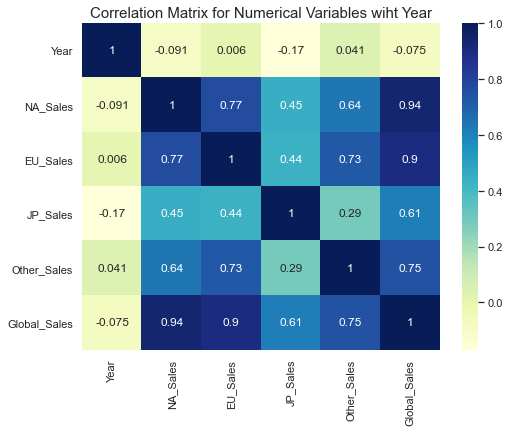

In [49]:
df = df_save.copy()
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(df.corr().round(3), annot=True, cmap='YlGnBu', ax=ax)
ax.set_title('Correlation Matrix for Numerical Variables wiht Year', fontsize=15);

Si bien existen **Year** con una gran cantidad de entradas, estas no guardan una relación con la cantidad de ventas

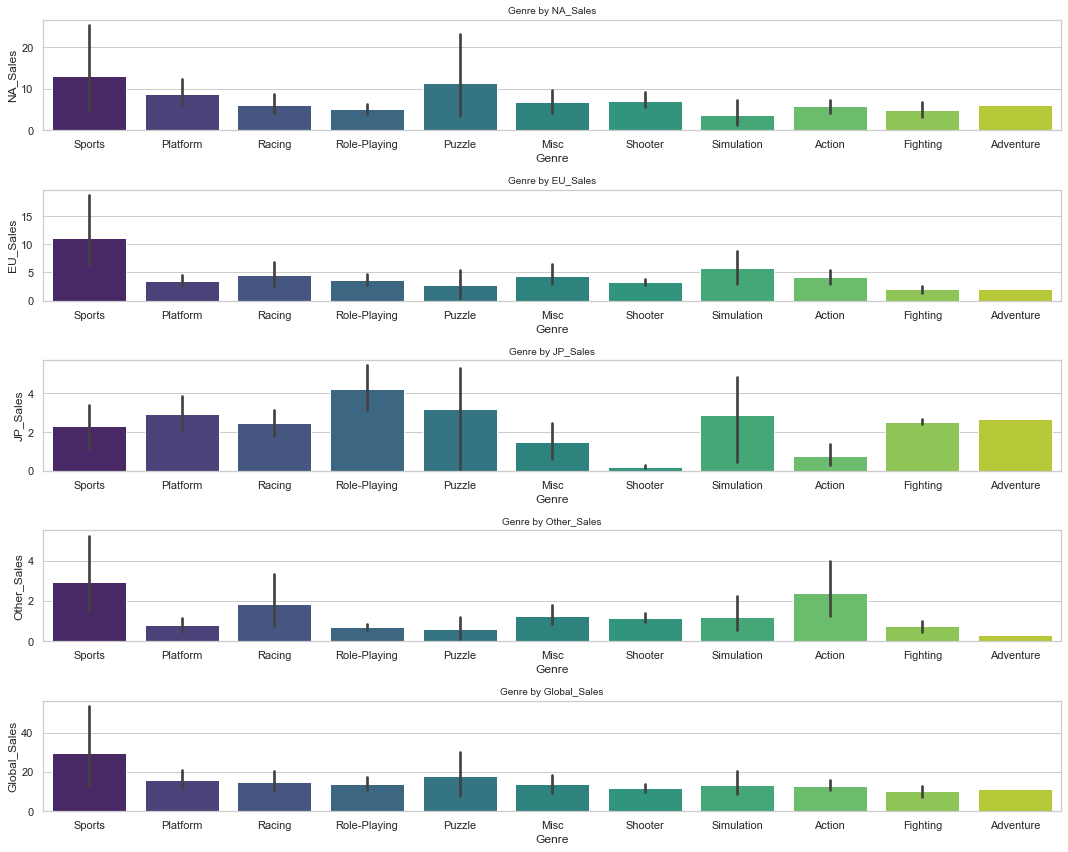

In [51]:
df.set_index('Genre', inplace=True)
fig, ax= plt.subplots(nrows=5,figsize=(15,12))
for i in range(5):
    sns.barplot(x='Genre', y=nums[i] ,data=df[nums[i]].reset_index().head(100), palette='viridis', ax=ax[i])
    ax[i].set_title(f'Genre by {nums[i]}', fontsize=10)
    #ax[i].xaxis.set_visible(False)
fig.tight_layout();

Podemos apreciar los **Genre** preferidos por cada región. En esta ocasión si estan clasificados por sus ventas.

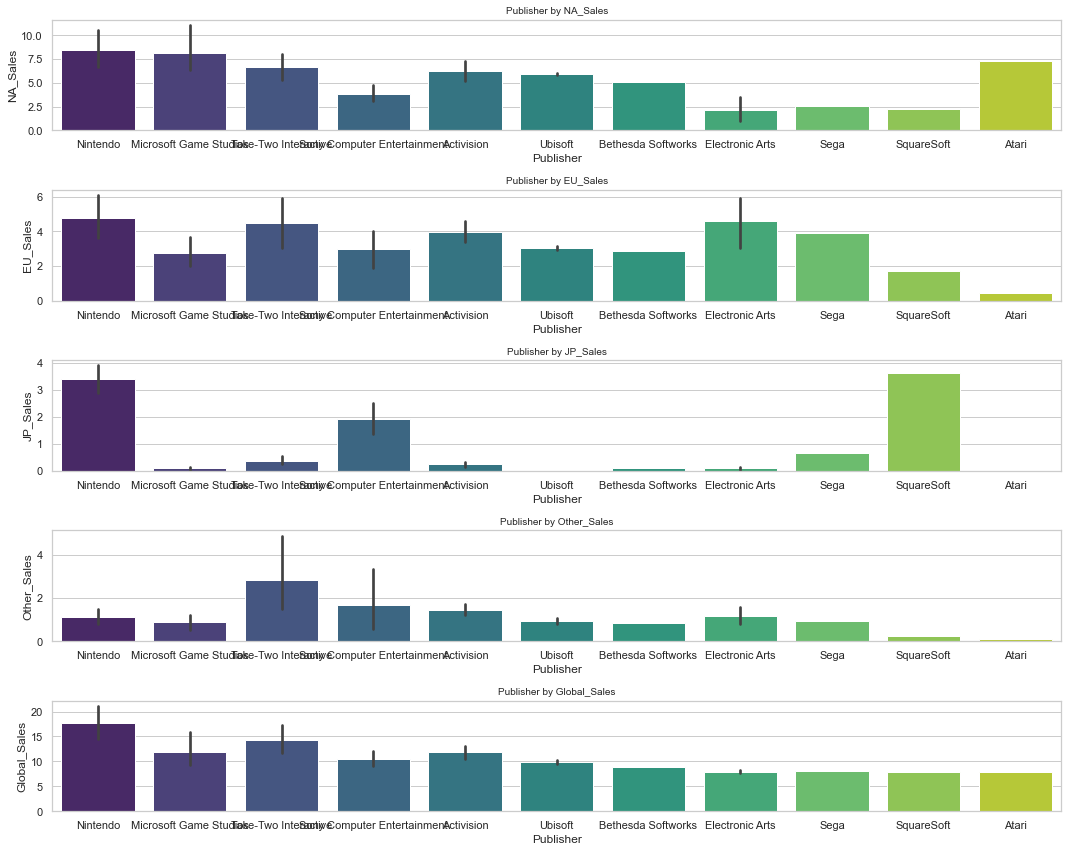

In [67]:
df.set_index('Publisher', inplace=True)
fig, ax= plt.subplots(nrows=5,figsize=(15,12))
for i in range(5):
    sns.barplot(x='Publisher', y=nums[i] ,data=df[nums[i]].reset_index().head(100), palette='viridis', ax=ax[i])
    ax[i].set_title(f'Publisher by {nums[i]}', fontsize=10)
    #ax[i].xaxis.set_visible(False)
fig.tight_layout();

Podemos apreciar los **Platform** preferidos por cada región. En esta ocasión si estan clasificados por sus ventas.

## Ampliaciones

- Actualizacion de los datos.
- Datos más precisos; las ventas aportan poca información. Desconocemos si los datos han sido recopilado en la semana de salida, o a lo largo de los años, en cuyo caso tampoco sabemos cuando se ha dejado de contabilizar
- Las regiones abarcan demasiado territorio; otras ventas podría incluye demasiados países como para identificar sus preferencias.
- Desconocemos si el juego ha sido un fracaso o un éxito; pese a sus numerosas ventas la empresa podría haber perdido dinero.